In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_csv('cleaned_propeller.csv')
normal = df[df['label'] == 0]
faulty = df[df['label'] == 1]

**Examine data**


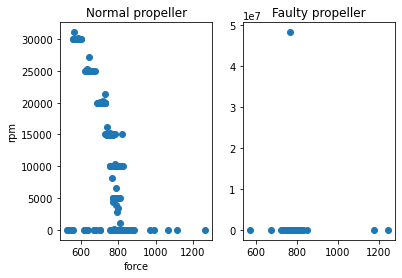

In [3]:
fig = plt.figure()
ax_norm = fig.add_subplot(121)
ax_norm.scatter(normal['force'], normal['rpm'])
ax_norm.set_xlabel('force')
ax_norm.set_ylabel('rpm')
ax_norm.set_title('Normal propeller')
ax_faulty = fig.add_subplot(122)
ax_faulty.scatter(faulty['force'], faulty['rpm'])
ax_faulty.set_title('Faulty propeller')
plt.show()

As can be seen from the figure on the right of "Faulty propeller", there is and extreme value which makes the figure unreadable.
Let's remove that only extreme just to have better view (without excluding it from train data)

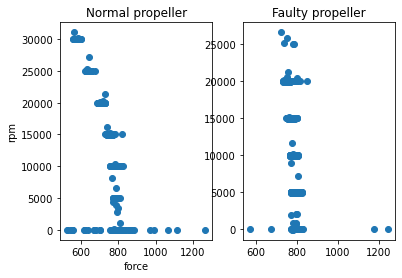

In [4]:
faulty_no_extreme = faulty[faulty['rpm'] < 40000]

fig = plt.figure()
ax_norm = fig.add_subplot(121)
ax_norm.scatter(normal['force'], normal['rpm'])
ax_norm.set_xlabel('force')
ax_norm.set_ylabel('rpm')
ax_norm.set_title('Normal propeller')
ax_faulty = fig.add_subplot(122)
ax_faulty.scatter(faulty_no_extreme['force'], faulty_no_extreme['rpm'])
ax_faulty.set_title('Faulty propeller')
plt.show()

**Merge normal and faulty data with label, shuffle and split data into train/test sets**

In [5]:
df = pd.concat([normal, faulty])
df.reset_index(drop=True, inplace=True)
X = df[['force','rpm']]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)
print(X_train.head())
print(y_train.head())

      force    rpm
1183    783      1
227     767  15006
692     787  10010
522     791   4986
788     778  14997
1183    1
227     0
692     1
522     1
788     1
Name: label, dtype: int64


In [ ]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))